# Predict The Flight Ticket Price 
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records
Size of test set: 2671 records

FEATURES:
$ Airline: The name of the airline.
$ Date_of_Journey: The date of the journey
$ Source: The source from which the service begins.
$ Destination: The destination where the service ends.
$ Route: The route taken by the flight to reach the destination.
$ Dep_Time: The time when the journey starts from the source.
$ Arrival_Time: Time of arrival at the destination.
$ Duration: Total duration of the flight.
$ Total_Stops: Total stops between the source and destination.
$ Additional_Info: Additional information about the flight
$ Price: The price of the ticket



In [167]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [168]:
#Loading Datasets
df=pd.read_csv("Data_Train.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [169]:
#Loading Datasets
df_test=pd.read_csv("Test_set.csv")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [170]:
#Lets check the null values in the dataset
df.isnull().sum()
# There are only 2 Nulls, we can remove it

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [171]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [172]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [173]:
df.shape

(10682, 11)

In [174]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [175]:
df_test.shape

(2671, 10)

In [176]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [177]:
df["Additional_Info"].value_counts()
# No Info is used twice

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [178]:
# Replacing
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})
df_test["Additional_Info"] = df_test["Additional_Info"].replace({'No Info': 'No info'})

In [179]:
# Let's have a look at the date and duration columns and convert to meaningful data
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [180]:
# First Let's Treat 'Duration'

# Need to convert duration into integer and remove 'h' and 'm'
# To convert to minutes we need hour*60 + Minutes... Let's replace 'h' with * (Multiplication operator) and ' '(blank)
# with '+'(Addition) and m with nothing ''
# Finally we need to evaluate the expression. SO we'll use eval and apply to all rows

df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','')
df['Duration']=df['Duration'].apply(eval)

df_test['Duration']=  df_test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','')
df_test['Duration']=df_test['Duration'].apply(eval)

In [181]:
# Let's check
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [182]:
# Let's treat Date_of_Journey
# I'll extract day, month and drop 'Date_of_Journey'. Year is 2019 only

#Let's convert to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format= "%d/%m/%Y")

df['Day'] = df['Date_of_Journey'].dt.day_name()
df['Month'] = df['Date_of_Journey'].dt.month_name()
df.drop(['Date_of_Journey'], axis = 1 , inplace = True)

# Test
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'],format= "%d/%m/%Y")

df_test['Day'] = df_test['Date_of_Journey'].dt.day_name()
df_test['Month'] = df_test['Date_of_Journey'].dt.month_name()
df_test.drop(['Date_of_Journey'], axis = 1 , inplace = True)

In [183]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,Sunday,March
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,Wednesday,May
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,Sunday,June
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,Sunday,May
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,Friday,March


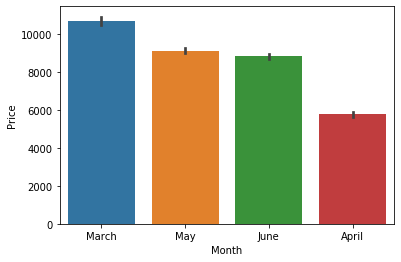

In [184]:
sns.barplot(x = 'Month', y='Price', data = df);
# March Prices are highest

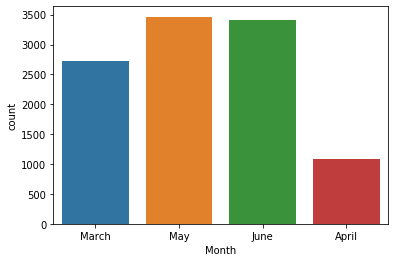

In [185]:
sns.countplot(x = 'Month', data = df)
# It's strange that March doesn't have max traffic

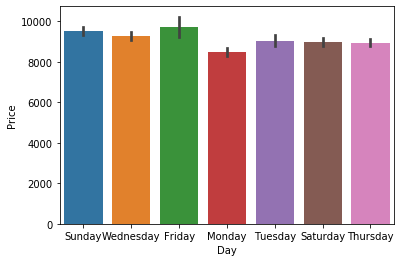

In [186]:
sns.barplot(x = 'Day', y='Price', data = df);
# Friday Prices are highest

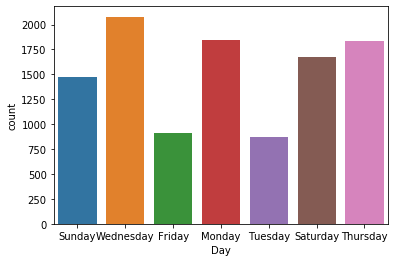

In [187]:
sns.countplot(x = 'Day', data = df)
# It's strange that Wednesdays have max traffic

In [188]:
# Let's convert Dep_Time to hors and minutes

df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

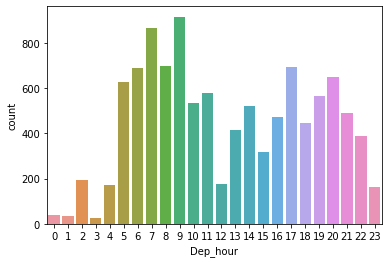

In [189]:
sns.countplot(df["Dep_hour"])
# Departures Peak at around 9am and then again around 8 pm

In [190]:
# Doing the same for Arrival_Time

df["Arrival_hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["Arrival_min"] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

df_test["Arrival_hour"] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

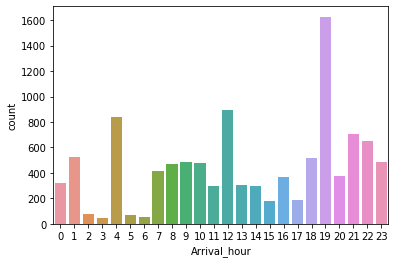

In [191]:
sns.countplot(df["Arrival_hour"])
# Arrival_hour Peaks at around 7 pm

In [192]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [193]:
# Let's also work on Total Stops
df['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'], [0, 1, 2, 3, 4], inplace=True)
df_test['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'], [0, 1, 2, 3, 4], inplace=True)

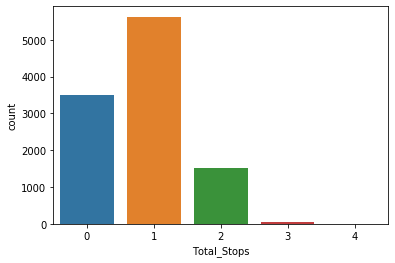

In [194]:
sns.countplot(df['Total_Stops'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

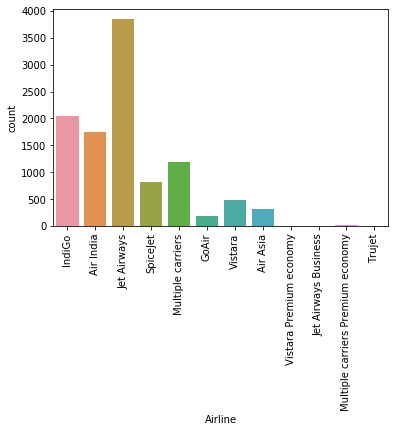

In [195]:
sns.countplot(df["Airline"])
plt.xticks(rotation=90)
# Maximum Flights are from Jet Airways

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

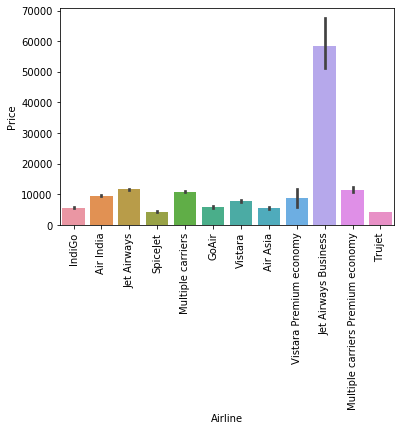

In [196]:
# Let's check avg. prices
sns.barplot(x=df["Airline"],y=df['Price'])
plt.xticks(rotation=90)
# Most Expensive Flights are from Jet Airways Business

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

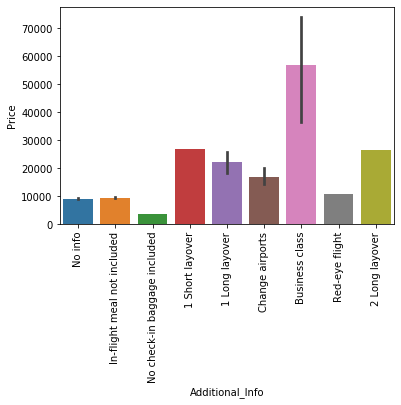

In [197]:
# Let's consider Additional Info
sns.barplot(df['Additional_Info'], df['Price'])
plt.xticks(rotation = 90)
# Business class is most expensive

In [198]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [199]:
# Let's define categorical variables and continous variables and label
target=['Price']
cat_col=['Airline','Source','Destination','Route','Additional_Info','Day', 'Month','Total_Stops']
cont_col=['Duration','Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min']
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration            int64
Total_Stops         int64
Additional_Info    object
Price               int64
Day                object
Month              object
Dep_hour            int64
Dep_min             int64
Arrival_hour        int64
Arrival_min         int64
dtype: object

In [200]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,Sunday,March,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,Wednesday,May,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,Sunday,June,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,Sunday,May,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,Friday,March,16,50,21,35


In [201]:
# Let's Label ENcode the objects
col=['Airline','Source','Destination','Route','Additional_Info','Day', 'Month']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[col] = df[col].apply(LabelEncoder().fit_transform)
df_test[col] = df_test[col].apply(LabelEncoder().fit_transform)

In [202]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,0,7,3897,3,2,22,20,1,10
1,1,3,0,84,445,2,7,7662,6,3,5,50,13,15
2,4,2,1,118,1140,2,7,13882,3,1,9,25,4,25
3,3,3,0,91,325,1,7,6218,3,3,18,5,23,30
4,3,0,5,29,285,1,7,13302,0,2,16,50,21,35


In [203]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,655,1,5,4,1,17,30,4,25
1,3,3,0,65,240,1,5,3,3,6,20,10,20
2,4,2,1,76,1425,1,3,5,3,19,15,19,0
3,6,2,1,76,780,1,5,5,3,8,0,21,0
4,0,0,2,16,170,0,5,1,1,23,55,2,45


In [204]:
# Let's separate Features and Labels
df_x=df.drop(columns=["Price"])
y=df[["Price"]]

In [205]:
# Let's do Standard Scaling(x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,-0.410805,-1.658359,2.416534,-1.547082,-0.931498,-1.220666,0.498649,-0.081814,0.196355,1.654154,-0.234950,-1.800436,-0.890014
1,-1.261152,0.890014,-0.973812,0.249946,-0.389953,1.741432,0.498649,1.449626,1.191826,-1.303113,1.363607,-0.050909,-0.587094
2,0.014369,0.040556,-0.295743,1.175687,0.978679,1.741432,0.498649,-0.081814,-0.799117,-0.607286,0.031476,-1.363054,0.018745
3,-0.410805,0.890014,-0.973812,0.440539,-0.626263,0.260383,0.498649,-0.081814,1.191826,0.958326,-1.034229,1.407030,0.321664
4,-0.410805,-1.658359,2.416534,-1.247577,-0.705034,0.260383,0.498649,-1.613255,0.196355,0.610412,1.363607,1.115442,0.624584


# Modelling

In [206]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [207]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [208]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

max r2 score corresponding to  64  is  0.4689289678995775


In [209]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [210]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  51  is  0.8629266383285467


In [211]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 3}

In [212]:
knr=KNeighborsRegressor(n_neighbors=3)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  98  is  0.7538953765910155


In [213]:
# SVM

from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [214]:
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x,y)

max r2 score corresponding to  64  is  0.45004981840323366


In [216]:
# Cross Validation

print("\n\nRandomForestRegressor\n\n")
model_evaluation(rfr,x,y)




RandomForestRegressor


Mean r2 score for regressor:  0.8130501285972581
standard deviation in r2 score for regressor:  0.025241597882092397
[0.80868967 0.81126709 0.83177213 0.843733   0.76978876]


In [217]:
# Based on above results let's select Random Forest Regression

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 51,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [219]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1607.949458054425
r2_score is:  0.8620793400397899


In [220]:
test_ss=sc.fit_transform(df_test)
test_ss=pd.DataFrame(test_ss,columns=df_test.columns)
test_ss.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0.011908,0.032567,-0.294882,0.797952,0.030389,0.247853,0.480394,0.412824,-0.816993,0.773265,0.267704,-1.361709,0.026340
1,-0.423779,0.877086,-0.976222,0.392406,-0.796151,0.247853,0.480394,-0.098373,1.197954,-1.161445,-0.256324,-0.509324,-0.271771
2,0.011908,0.032567,-0.294882,0.797952,1.563970,0.247853,-2.148975,0.924021,1.197954,1.125030,-0.518338,0.769252,-1.464213
3,0.883281,0.032567,-0.294882,0.797952,0.279347,0.247853,0.480394,0.924021,1.197954,-0.809679,-1.304381,1.053380,-1.464213
4,-1.730840,-1.656471,0.386458,-1.414118,-0.935567,-1.239823,0.480394,-1.120768,-0.816993,1.828561,1.577774,-1.645837,1.218783


In [221]:
test_data = test_ss.copy()
import joblib
joblib.dump(rfr,'Flight_Price.pkl')
file=joblib.load('Flight_Price.pkl')
prediction=file.predict(test_data)

In [222]:
F_Price = pd.DataFrame({"Price": prediction})
F_Price.to_csv('F_Price.csv', index=False)

In [223]:
Price = pd.read_csv('F_Price.csv')
Price.head()

,Price
0,14756.718500
1,4393.786000
2,12898.000000
3,12497.157924
4,4415.842800
